<a href="https://colab.research.google.com/github/samade123/deep_learning_project/blob/main/Visualising_what_convnets_see.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
keras.__version__
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas
# from progress.bar import Bar
from tqdm import tqdm_notebook as tqdm


print("\nTensorflow Version: " + tf.__version__)
# print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.

Tensorflow Version: 2.4.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  False


In [ ]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('conv_model.h5')

# Show the model architecture
# new_model.summary()

In [ ]:
(conv_train_images, conv_train_labels), (conv_test_images, conv_test_labels) = tf.keras.datasets.fashion_mnist.load_data()  # split into tetsing and training

# Normalize pixel values to be between 0 and 1

conv_train_images = conv_train_images.reshape((60000, 28, 28, 1))

conv_train_images, conv_test_images = conv_train_images / 255.0, conv_test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:

def show_image(img, label="", guess=""):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def predict(model, image, correct_label, num):
#   class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

#   print(prediction, predicted_class)
  image = test_images[num]
  show_image(image, class_names[correct_label], predicted_class)


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

def select_number(num=0):
    return_val = False
    if num == 0:
        num = get_number()
        return_val = True
    image = test_images[num]
    label = test_labels[num]
    predict(new_model, image, label, num)
    if return_val:
        return num

def show_convoluted_image(original_image, original_label="dunno", guess="dunno"):
    #Show the image
    plt.figure()
    plt.grid(False)
    # original_label = class_names[original_label]
    # guess = class_names[guess]

    plt.imshow(np.reshape(original_image, (28, 28)), cmap=plt.cm.binary)
    plt.title("Model Prediction: {}".format(guess))
    plt.xlabel("Original Label: {}".format(original_label))


    plt.show()        

In [ ]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
img_tensor = conv_train_images[456]
img_tensor = tf.convert_to_tensor(img_tensor.reshape((28,28))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor
img_tensor = np.expand_dims(img_tensor, axis=0)

# img_tensor = image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# print(img_tensor[0][0])

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

(1, 26, 26, 32)


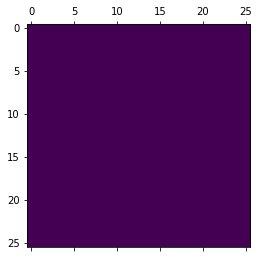

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 9], cmap='viridis')
plt.show()

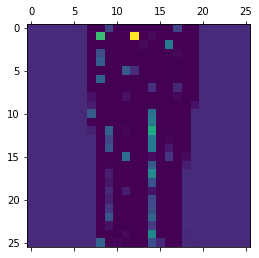

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

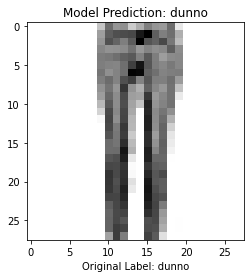

In [ ]:
show_convoluted_image(img_tensor)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


IndexError: ignored

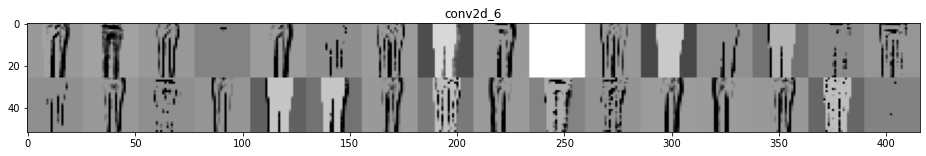

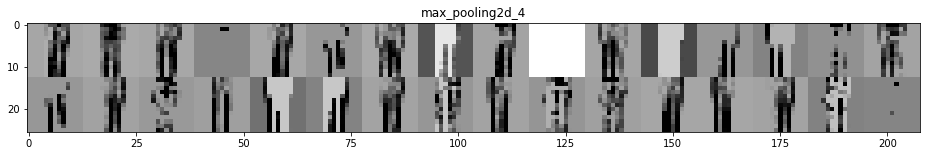

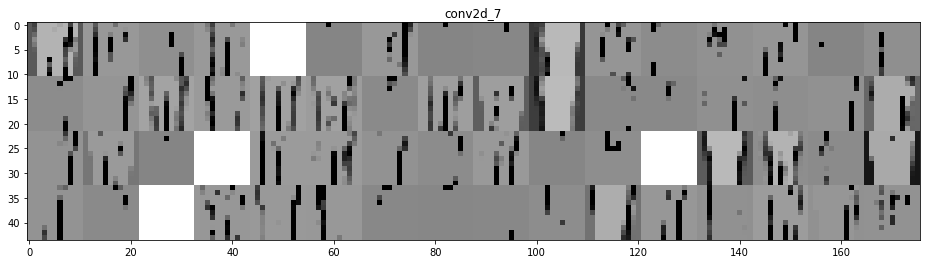

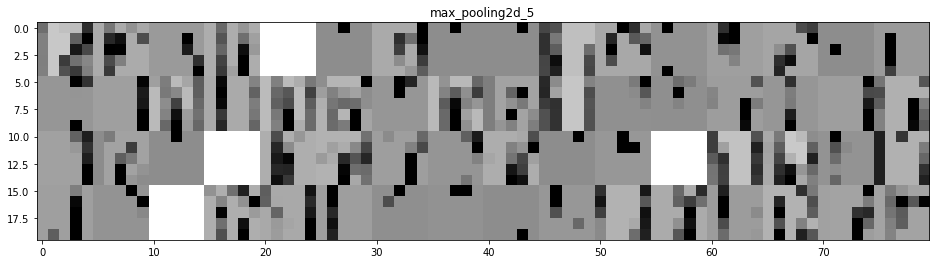

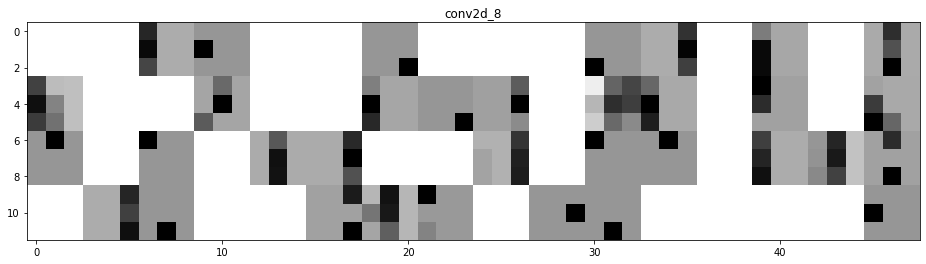

In [ ]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap=plt.cm.binary)
    
plt.show()

In [ ]:
from __future__ import print_function

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

valid_imshow_data(img_tensor)
